<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Statistics (1)

Dr. Yves J. Hilpisch

The Python Quants GmbH

<a href='http://fpq.io'>http://fpq.io</a> | <a href='mailto:team@tpq.io'>team@tpq.io</a>

## Normality Tests

### Benchmark Case

In [1]:
import warnings
warnings.simplefilter('ignore')
import numpy as np
np.random.seed(1000)
import scipy.stats as scs
import statsmodels.api as sm
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [2]:
def gen_paths(S0, r, sigma, T, M, I):
    ''' Generate Monte Carlo paths for geometric Brownian motion.
    
    Parameters
    ==========
    S0 : float
        initial stock/index value
    r : float
        constant short rate
    sigma : float
        constant volatility
    T : float
        final time horizon
    M : int
        number of time steps/intervals
    I : int
        number of paths to be simulated
        
    Returns
    =======
    paths : ndarray, shape (M + 1, I)
        simulated paths given the parameters
    '''
    dt = float(T) / M
    paths = np.zeros((M + 1, I), np.float64)
    paths[0] = S0
    for t in range(1, M + 1):
        rand = np.random.standard_normal(I)
        rand = (rand - rand.mean()) / rand.std()
        paths[t] = paths[t - 1] * np.exp((r - 0.5 * sigma ** 2) * dt +
                                         sigma * np.sqrt(dt) * rand)
    return paths

In [3]:
S0 = 100.
r = 0.05
sigma = 0.2
T = 1.0
M = 50
I = 250000

In [4]:
paths = gen_paths(S0, r, sigma, T, M, I)

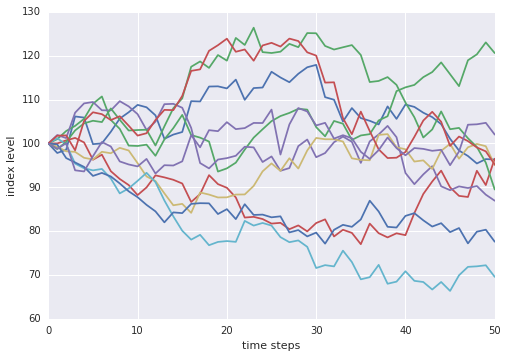

In [5]:
plt.plot(paths[:, :10])
plt.grid(True)
plt.xlabel('time steps')
plt.ylabel('index level')

In [6]:
log_returns = np.log(paths[1:] / paths[0:-1]) 

In [7]:
paths[:, 0].round(4)

array([ 100.    ,   97.821 ,   98.5573,  106.1546,  105.899 ,   99.8363,
        100.0145,  102.6589,  105.6643,  107.1107,  108.7943,  108.2449,
        106.4105,  101.0575,  102.0197,  102.6052,  109.6419,  109.5725,
        112.9766,  113.0225,  112.5476,  114.5585,  109.942 ,  112.6271,
        112.7502,  116.3453,  115.0443,  113.9586,  115.8831,  117.3705,
        117.9185,  110.5539,  109.9687,  104.9957,  108.0679,  105.7822,
        105.1585,  104.3304,  108.4387,  105.5963,  108.866 ,  108.3284,
        107.0077,  106.0034,  104.3964,  101.0637,   98.3776,   97.135 ,
         95.4254,   96.4271,   96.3386])

In [8]:
log_returns[:, 0].round(4)

array([-0.022 ,  0.0075,  0.0743, -0.0024, -0.059 ,  0.0018,  0.0261,
        0.0289,  0.0136,  0.0156, -0.0051, -0.0171, -0.0516,  0.0095,
        0.0057,  0.0663, -0.0006,  0.0306,  0.0004, -0.0042,  0.0177,
       -0.0411,  0.0241,  0.0011,  0.0314, -0.0112, -0.0095,  0.0167,
        0.0128,  0.0047, -0.0645, -0.0053, -0.0463,  0.0288, -0.0214,
       -0.0059, -0.0079,  0.0386, -0.0266,  0.0305, -0.0049, -0.0123,
       -0.0094, -0.0153, -0.0324, -0.0269, -0.0127, -0.0178,  0.0104,
       -0.0009])

In [9]:
def print_statistics(array):
    ''' Prints selected statistics.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    sta = scs.describe(array)
    print "%14s %15s" % ('statistic', 'value')
    print 30 * "-"
    print "%14s %15.5f" % ('size', sta[0])
    print "%14s %15.5f" % ('min', sta[1][0])
    print "%14s %15.5f" % ('max', sta[1][1])
    print "%14s %15.5f" % ('mean', sta[2])
    print "%14s %15.5f" % ('std', np.sqrt(sta[3]))
    print "%14s %15.5f" % ('skew', sta[4])
    print "%14s %15.5f" % ('kurtosis', sta[5])

In [10]:
print_statistics(log_returns.flatten())

     statistic           value
------------------------------
          size  12500000.00000
           min        -0.15664
           max         0.15371
          mean         0.00060
           std         0.02828
          skew         0.00055
      kurtosis         0.00085


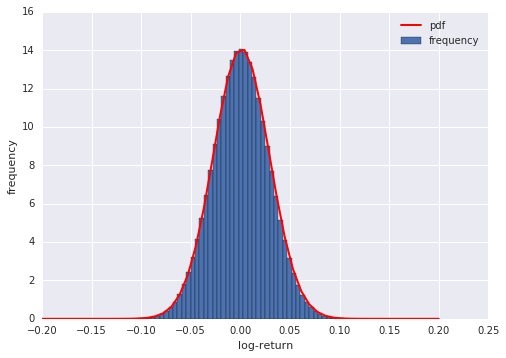

In [11]:
plt.hist(log_returns.flatten(), bins=70, normed=True, label='frequency')
plt.grid(True)
plt.xlabel('log-return')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, loc=r / M, scale=sigma / np.sqrt(M)),
         'r', lw=2.0, label='pdf')
plt.legend()

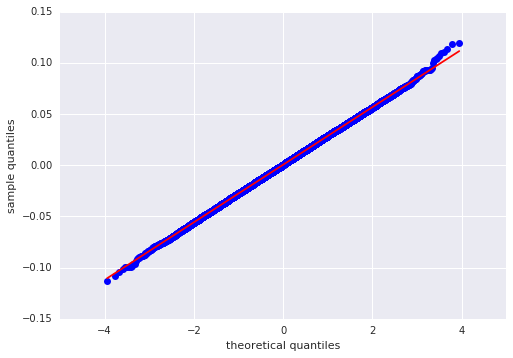

In [12]:
sm.qqplot(log_returns.flatten()[::500], line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [13]:
def normality_tests(arr):
    ''' Tests for normality distribution of given data set.
    
    Parameters
    ==========
    array: ndarray
        object to generate statistics on
    '''
    print "Skew of data set  %14.3f" % scs.skew(arr)
    print "Skew test p-value %14.3f" % scs.skewtest(arr)[1]
    print "Kurt of data set  %14.3f" % scs.kurtosis(arr)
    print "Kurt test p-value %14.3f" % scs.kurtosistest(arr)[1]
    print "Norm test p-value %14.3f" % scs.normaltest(arr)[1]

In [14]:
normality_tests(log_returns.flatten())

Skew of data set           0.001
Skew test p-value          0.430
Kurt of data set           0.001
Kurt test p-value          0.541
Norm test p-value          0.607


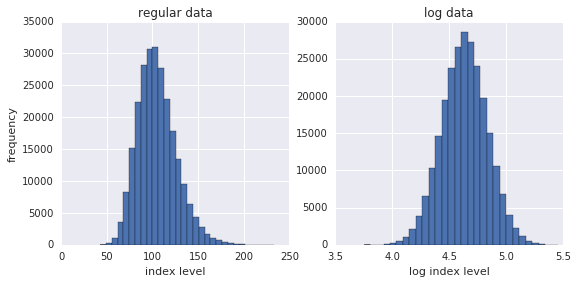

In [15]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(9, 4))
ax1.hist(paths[-1], bins=30)
ax1.grid(True)
ax1.set_xlabel('index level')
ax1.set_ylabel('frequency')
ax1.set_title('regular data')
ax2.hist(np.log(paths[-1]), bins=30)
ax2.grid(True)
ax2.set_xlabel('log index level')
ax2.set_title('log data')

In [16]:
print_statistics(paths[-1])

     statistic           value
------------------------------
          size    250000.00000
           min        42.74870
           max       233.58435
          mean       105.12645
           std        21.23174
          skew         0.61116
      kurtosis         0.65182


In [17]:
print_statistics(np.log(paths[-1]))

     statistic           value
------------------------------
          size    250000.00000
           min         3.75534
           max         5.45354
          mean         4.63517
           std         0.19998
          skew        -0.00092
      kurtosis        -0.00327


In [18]:
normality_tests(np.log(paths[-1]))

Skew of data set          -0.001
Skew test p-value          0.851
Kurt of data set          -0.003
Kurt test p-value          0.744
Norm test p-value          0.931


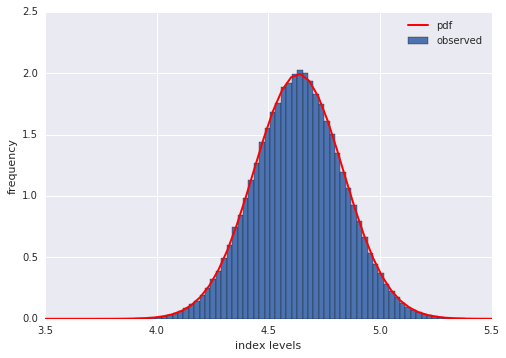

In [19]:
log_data = np.log(paths[-1])
plt.hist(log_data, bins=70, normed=True, label='observed')
plt.grid(True)
plt.xlabel('index levels')
plt.ylabel('frequency')
x = np.linspace(plt.axis()[0], plt.axis()[1])
plt.plot(x, scs.norm.pdf(x, log_data.mean(), log_data.std()),
         'r', lw=2.0, label='pdf')
plt.legend()

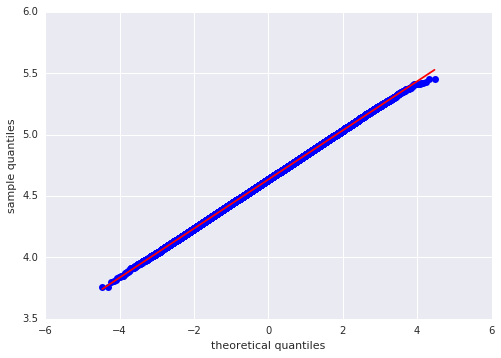

In [20]:
sm.qqplot(log_data, line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

### Real World Data

In [21]:
import pandas as pd
from pandas_datareader import data as web

In [22]:
symbols = ['^GDAXI', '^GSPC', 'YHOO', 'MSFT']

In [23]:
try:
    h5 = pd.HDFStore('port.h5')
    data = h5['norm']
    h5.close()
except:
    data = pd.DataFrame()
    for sym in symbols:
        data[sym] = web.DataReader(sym, data_source='yahoo',
                                start='1/1/2006')['Adj Close']
    data = data.dropna()
    h5 = pd.HDFStore('port.h5')
    h5['norm'] = data
    h5.close()

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2641 entries, 2006-01-03 to 2016-08-11
Data columns (total 4 columns):
^GDAXI    2641 non-null float64
^GSPC     2641 non-null float64
YHOO      2641 non-null float64
MSFT      2641 non-null float64
dtypes: float64(4)
memory usage: 103.2 KB


In [25]:
data.head()

,^GDAXI,^GSPC,YHOO,MSFT
Date,,,,
2006-01-03,5460.680176,1268.800049,40.910000,21.073954
2006-01-04,5523.620117,1273.459961,40.970001,21.176025
2006-01-05,5516.529785,1273.479980,41.529999,21.191729
2006-01-06,5536.319824,1285.449951,43.209999,21.128915
2006-01-09,5537.109863,1290.150024,43.419998,21.089658


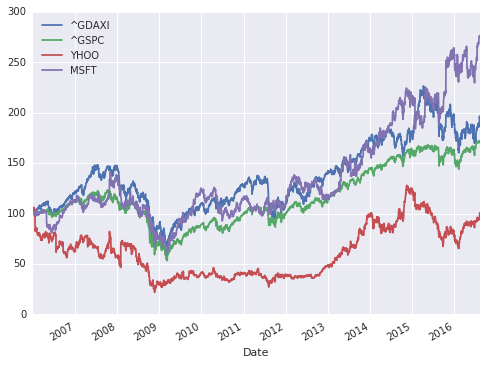

In [26]:
(data / data.ix[0] * 100).plot(figsize=(8, 6), grid=True)

In [27]:
log_returns = np.log(data / data.shift(1))
log_returns.head()

,^GDAXI,^GSPC,YHOO,MSFT
Date,,,,
2006-01-03,NaN,NaN,NaN,NaN
2006-01-04,0.011460,0.003666,0.001466,0.004832
2006-01-05,-0.001284,0.000016,0.013576,0.000741
2006-01-06,0.003581,0.009356,0.039656,-0.002968
2006-01-09,0.000143,0.003650,0.004848,-0.001860


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f06a97f1150>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f06a96a1410>]], dtype=object)

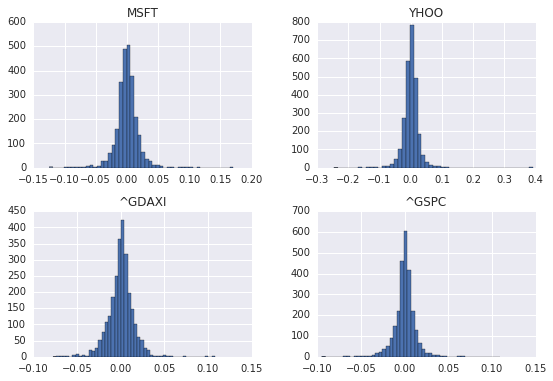

In [28]:
log_returns.hist(bins=50, figsize=(9, 6))

In [29]:
for sym in symbols:
    print "\nResults for symbol %s" % sym
    print 30 * "-"
    log_data = np.array(log_returns[sym].dropna())
    print_statistics(log_data)


Results for symbol ^GDAXI
------------------------------
     statistic           value
------------------------------
          size      2640.00000
           min        -0.07739
           max         0.10797
          mean         0.00026
           std         0.01469
          skew        -0.05008
      kurtosis         5.45748

Results for symbol ^GSPC
------------------------------
     statistic           value
------------------------------
          size      2640.00000
           min        -0.09470
           max         0.10957
          mean         0.00021
           std         0.01299
          skew        -0.32400
      kurtosis        10.17948

Results for symbol YHOO
------------------------------
     statistic           value
------------------------------
          size      2640.00000
           min        -0.24636
           max         0.39182
          mean         0.00000
           std         0.02519
          skew         0.50671
      kurtosis        3

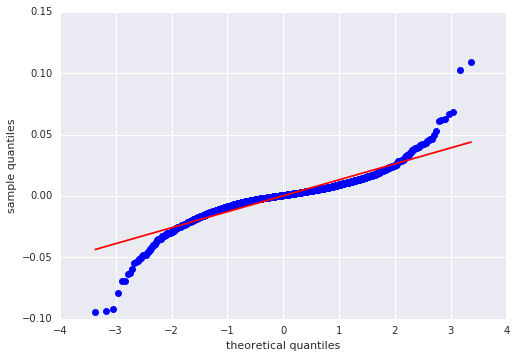

In [30]:
sm.qqplot(log_returns['^GSPC'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

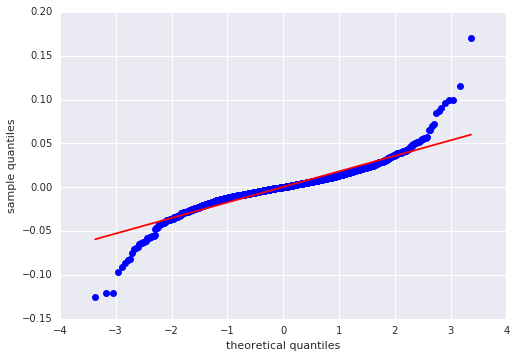

In [31]:
sm.qqplot(log_returns['MSFT'].dropna(), line='s')
plt.grid(True)
plt.xlabel('theoretical quantiles')
plt.ylabel('sample quantiles')

In [32]:
for sym in symbols:
    print "\nResults for symbol %s" % sym
    print 32 * "-"
    log_data = np.array(log_returns[sym].dropna())
    normality_tests(log_data)


Results for symbol ^GDAXI
--------------------------------
Skew of data set          -0.050
Skew test p-value          0.292
Kurt of data set           5.457
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol ^GSPC
--------------------------------
Skew of data set          -0.324
Skew test p-value          0.000
Kurt of data set          10.179
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol YHOO
--------------------------------
Skew of data set           0.507
Skew test p-value          0.000
Kurt of data set          31.086
Kurt test p-value          0.000
Norm test p-value          0.000

Results for symbol MSFT
--------------------------------
Skew of data set           0.064
Skew test p-value          0.180
Kurt of data set           9.872
Kurt test p-value          0.000
Norm test p-value          0.000


## Portfolio Optimization

### The Data

In [33]:
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
symbols = ['AAPL', 'MSFT', 'YHOO', 'DB', 'GLD']
noa = len(symbols)

In [35]:
try:
    h5 = pd.HDFStore('port.h5')
    data = h5['mvp']
    h5.close()
except:
    data = pd.DataFrame()
    for sym in symbols:
        data[sym] = web.DataReader(sym, data_source='yahoo',
                                   end='2014-09-12')['Adj Close']
    data.columns = symbols
    data = data.dropna()
    h5 = pd.HDFStore('port.h5')
    h5['mvp'] = data
    h5.close()

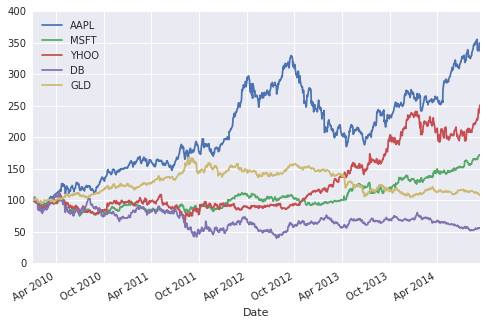

In [36]:
(data / data.ix[0] * 100).plot(figsize=(8, 5), grid=True)

In [37]:
rets = np.log(data / data.shift(1))

In [38]:
rets.mean() * 252

AAPL    0.267080
MSFT    0.114505
YHOO    0.196165
DB     -0.125174
GLD     0.016054
dtype: float64

In [39]:
rets.cov() * 252

,AAPL,MSFT,YHOO,DB,GLD
AAPL,0.072784,0.020459,0.023243,0.041027,0.005231
MSFT,0.020459,0.049402,0.024244,0.046089,0.002105
YHOO,0.023243,0.024244,0.093349,0.051538,-0.000864
DB,0.041027,0.046089,0.051538,0.177517,0.008777
GLD,0.005231,0.002105,-0.000864,0.008777,0.032406


In [40]:
rets.corr()

,AAPL,MSFT,YHOO,DB,GLD
AAPL,1.000000,0.341181,0.281978,0.360936,0.107719
MSFT,0.341181,1.000000,0.357001,0.492154,0.052611
YHOO,0.281978,0.357001,1.000000,0.400361,-0.015714
DB,0.360936,0.492154,0.400361,1.000000,0.115717
GLD,0.107719,0.052611,-0.015714,0.115717,1.000000


### The Basic Theory

In [41]:
weights = np.random.random(noa)
weights /= np.sum(weights)

In [42]:
weights

array([ 0.0346395 ,  0.02726489,  0.2868883 ,  0.10396806,  0.54723926])

In [43]:
np.sum(rets.mean() * weights) * 252
  # expected portfolio return

0.064422324754176294

In [44]:
np.dot(weights.T, np.dot(rets.cov() * 252, weights))
  # expected portfolio variance

0.024930244331131932

In [45]:
np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
  # expected portfolio standard deviation/volatility

0.15789314212825056

In [46]:
prets = []
pvols = []
for p in range(2500):
    weights = np.random.random(noa)
    weights /= np.sum(weights)
    prets.append(np.sum(rets.mean() * weights) * 252)
    pvols.append(np.sqrt(np.dot(weights.T, 
                        np.dot(rets.cov() * 252, weights))))
prets = np.array(prets)
pvols = np.array(pvols)

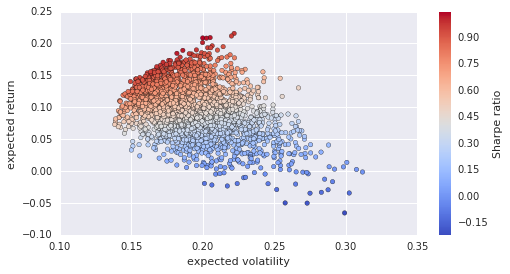

In [47]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets, c=prets / pvols, marker='o', cmap=plt.cm.coolwarm)
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Portfolio Optimizations

In [48]:
def statistics(weights):
    ''' Return portfolio statistics.
    
    Parameters
    ==========
    weights : array-like
        weights for different securities in portfolio
    
    Returns
    =======
    pret : float
        expected portfolio return
    pvol : float
        expected portfolio volatility
    pret / pvol : float
        Sharpe ratio for rf=0
    '''
    weights = np.array(weights)
    pret = np.sum(rets.mean() * weights) * 252
    pvol = np.sqrt(np.dot(weights.T, np.dot(rets.cov() * 252, weights)))
    return np.array([pret, pvol, pret / pvol])

In [49]:
import scipy.optimize as sco

In [50]:
def min_func_sharpe(weights):
    return -statistics(weights)[2]

In [51]:
cons = ({'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})

In [52]:
bnds = tuple((0, 1) for x in range(noa))

In [53]:
noa * [1. / noa,]

[0.2, 0.2, 0.2, 0.2, 0.2]

In [54]:
%%time
opts = sco.minimize(min_func_sharpe, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

CPU times: user 56.1 ms, sys: 0 ns, total: 56.1 ms
Wall time: 56.4 ms


In [55]:
opts

     fun: -1.063008502878521
     jac: array([ -1.82956457e-04,  -7.02321529e-04,   7.18042254e-04,
         1.51409821e+00,   1.54870749e-03,   0.00000000e+00])
 message: 'Optimization terminated successfully.'
    nfev: 36
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([  6.61851771e-01,   8.64634650e-02,   2.51684764e-01,
         8.18914842e-16,   0.00000000e+00])

In [56]:
opts['x'].round(3)

array([ 0.662,  0.086,  0.252,  0.   ,  0.   ])

In [57]:
statistics(opts['x']).round(3)

array([ 0.236,  0.222,  1.063])

In [58]:
def min_func_variance(weights):
    return statistics(weights)[1] ** 2

In [59]:
optv = sco.minimize(min_func_variance, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [60]:
optv

     fun: 0.018288001063314231
     jac: array([ 0.03637058,  0.03644131,  0.03614311,  0.05221015,  0.03676901,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 64
     nit: 9
    njev: 9
  status: 0
 success: True
       x: array([  1.07601847e-01,   2.48940071e-01,   1.09310048e-01,
         1.17093835e-17,   5.34148034e-01])

In [61]:
optv['x'].round(3)

array([ 0.108,  0.249,  0.109,  0.   ,  0.534])

In [62]:
statistics(optv['x']).round(3)

array([ 0.087,  0.135,  0.645])

### Efficient Frontier

In [63]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
bnds = tuple((0, 1) for x in weights)

In [64]:
def min_func_port(weights):
    return statistics(weights)[1]

In [65]:
%%time
trets = np.linspace(0.0, 0.25, 50)
tvols = []
for tret in trets:
    cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - tret},
            {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
    res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)
    tvols.append(res['fun'])
tvols = np.array(tvols)

CPU times: user 6.85 s, sys: 7.12 ms, total: 6.85 s
Wall time: 6.86 s


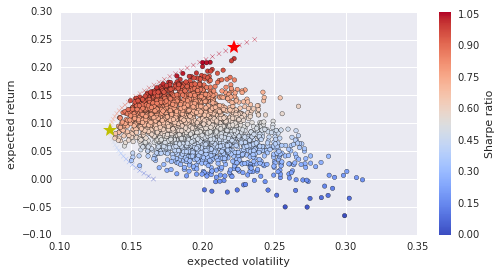

In [66]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=prets / pvols, marker='o', cmap=plt.cm.coolwarm)
            # random portfolio composition
plt.scatter(tvols, trets,
            c=trets / tvols, marker='x', cmap=plt.cm.coolwarm)
            # efficient frontier
plt.plot(statistics(opts['x'])[1], statistics(opts['x'])[0],
         'r*', markersize=15.0)
            # portfolio with highest Sharpe ratio
plt.plot(statistics(optv['x'])[1], statistics(optv['x'])[0],
         'y*', markersize=15.0)
            # minimum variance portfolio
plt.grid(True)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

### Capital Market Line

In [67]:
import scipy.interpolate as sci

In [68]:
ind = np.argmin(tvols)
evols = tvols[ind:]
erets = trets[ind:]

In [69]:
tck = sci.splrep(evols, erets)

In [70]:
def f(x):
    ''' Efficient frontier function (splines approximation). '''
    return sci.splev(x, tck, der=0)
def df(x):
    ''' First derivative of efficient frontier function. '''
    return sci.splev(x, tck, der=1)

In [71]:
def equations(p, rf=0.01):
    eq1 = rf - p[0]
    eq2 = rf + p[1] * p[2] - f(p[2])
    eq3 = p[1] - df(p[2])
    return eq1, eq2, eq3

In [72]:
opt = sco.fsolve(equations, [0.01, 0.5, 0.15])

In [73]:
opt

array([ 0.01      ,  1.01832892,  0.22606876])

In [74]:
np.round(equations(opt), 6)

array([ 0.,  0.,  0.])

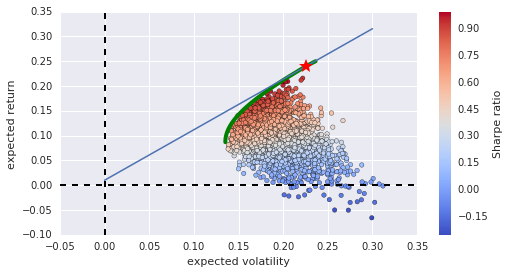

In [75]:
plt.figure(figsize=(8, 4))
plt.scatter(pvols, prets,
            c=(prets - 0.01) / pvols, marker='o', cmap=plt.cm.coolwarm)
            # random portfolio composition
plt.plot(evols, erets, 'g', lw=4.0)
            # efficient frontier
cx = np.linspace(0.0, 0.3)
plt.plot(cx, opt[0] + opt[1] * cx, lw=1.5)
            # capital market line
plt.plot(opt[2], f(opt[2]), 'r*', markersize=15.0) 
plt.grid(True)
plt.axhline(0, color='k', ls='--', lw=2.0)
plt.axvline(0, color='k', ls='--', lw=2.0)
plt.xlabel('expected volatility')
plt.ylabel('expected return')
plt.colorbar(label='Sharpe ratio')

In [76]:
cons = ({'type': 'eq', 'fun': lambda x:  statistics(x)[0] - f(opt[2])},
        {'type': 'eq', 'fun': lambda x:  np.sum(x) - 1})
res = sco.minimize(min_func_port, noa * [1. / noa,], method='SLSQP',
                       bounds=bnds, constraints=cons)

In [77]:
res['x'].round(3)

array([ 0.687,  0.057,  0.256,  0.   ,  0.   ])

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="mailto:yves@tpq.io">yves@tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="http://hilpisch.com" target="_blank">http://hilpisch.com</a> 

**Quant Platform** &mdash; <a href="http://quant-platform.com" target="_blank">http://quant-platform.com</a>

**Python for Finance** &mdash; <a href="http://python-for-finance.com" target="_blank">http://python-for-finance.com</a>

**Derivatives Analytics with Python** &mdash; <a href="http://derivatives-analytics-with-python.com" target="_blank">http://derivatives-analytics-with-python.com</a>

**Python Trainings** &mdash; <a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>